### Plot the number of MAGs for various quality

Near complete: 90% completeness and 5% contamination\
Higher quality: 70% completeness and 10% contamination\
Medium quality: 50% completeness and 10% contamination

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
colors = ['#104e8b', '#1f77b4', '#aec7e8']

mags_counts = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/performance_results.csv', header=0, sep='\t')
mags_counts.index = mags_counts['Tools']
mags_counts = mags_counts.iloc[::-1]

    

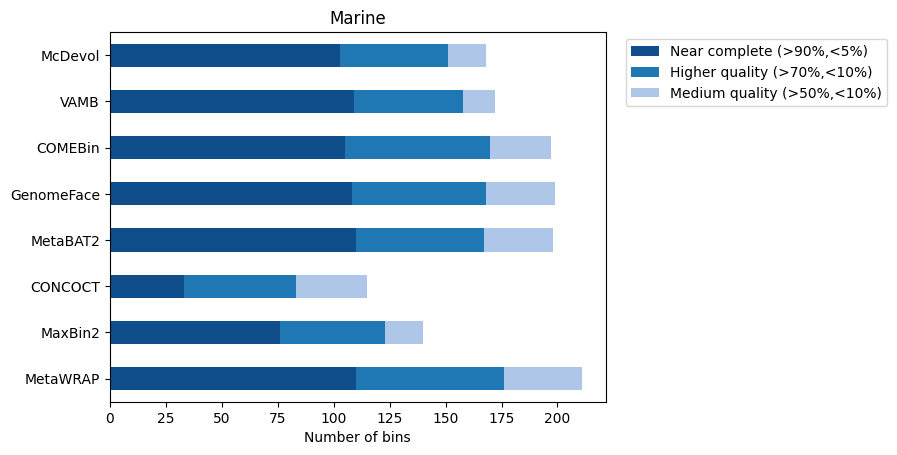

In [57]:
# Pooled assembly
ma_pooled = mags_counts.loc[mags_counts['Dataset']=='marine pooled']

plot_data = ma_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
plot_data.plot.barh(stacked=True, color=colors)
plt.title('Marine')
plt.xlabel('bin counts')
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('plots/pooled_assembly_marine.png', dpi=600, format='png', bbox_inches='tight')


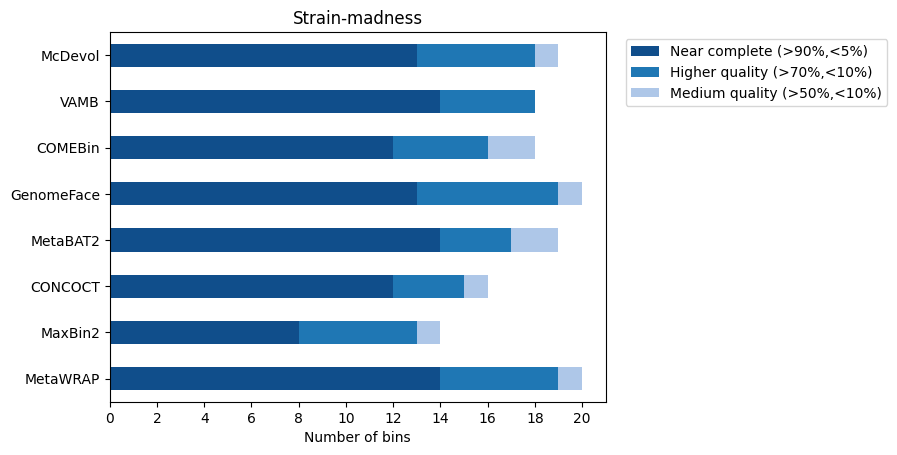

In [58]:

ss_pooled = mags_counts.loc[mags_counts['Dataset']=='strain pooled']

plot_data = ss_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
plot_data.plot.barh(stacked=True, color=colors)
plt.title('Strain-madness')
plt.xlabel('bin counts')
plt.xticks(range(0,22,2))
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'],loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('plots/pooled_assembly_strain.png', dpi=600, format='png', bbox_inches='tight')

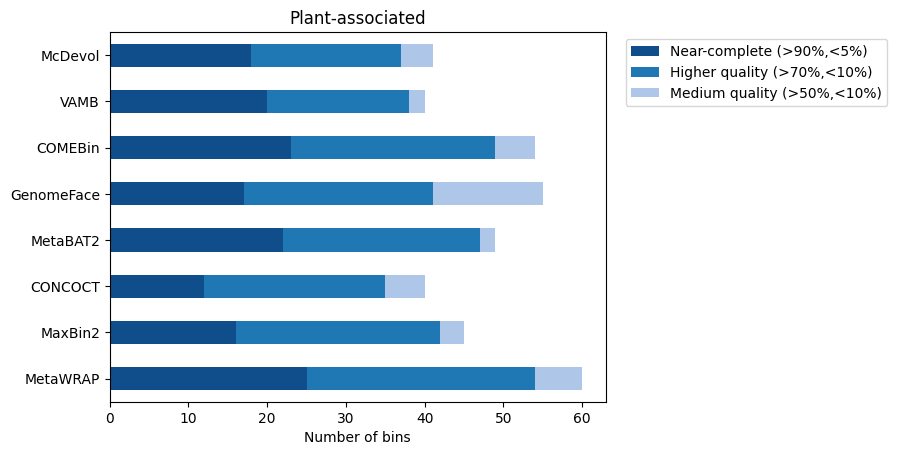

In [59]:
pl_pooled = mags_counts.loc[mags_counts['Dataset']=='plant pooled']

plot_data = pl_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
plot_data.plot.barh(stacked=True, color=colors)
plt.title('Plant-associated')
plt.xlabel('bin counts')
plt.xlabel('Number of bins')
plt.legend(['Near-complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'],loc=(1.04, 0.8))#'', frameon=False)
plt.ylabel('')
plt.savefig('plots/pooled_assembly_plant.png', dpi=600, format='png', bbox_inches='tight')

### Reassembly results

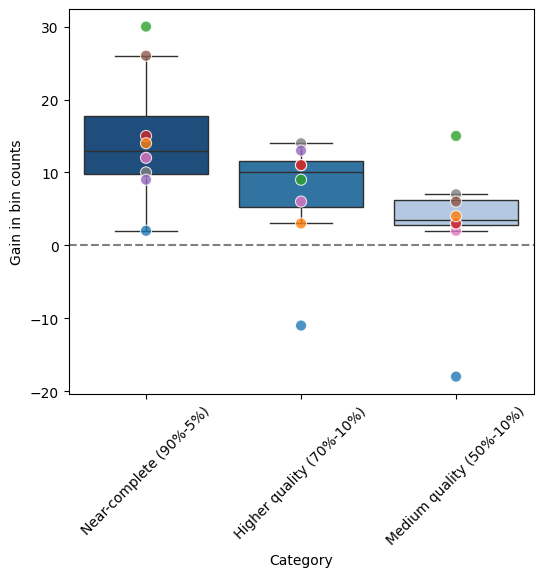

In [63]:
import seaborn as sns
tools_order = ['McDevol', 'VAMB', 'COMEBin', 'GenomeFace', 'MetaBAT2', 'CONCOCT', 'MaxBin2', 'MetaWRAP']
ma_pooled = mags_counts[mags_counts['Dataset'] == 'marine pooled'].set_index('Tools')
ma_reassembly = mags_counts[mags_counts['Dataset'] == 'marine reassembly'].set_index('Tools')

ma_diff = ma_reassembly[['Near-complete (90%-5%)', 'Higher quality (70%-10%)', 'Medium quality (50%-10%)']] - \
          ma_pooled[['Near-complete (90%-5%)', 'Higher quality (70%-10%)', 'Medium quality (50%-10%)']]

# Reset index to make 'Tools' a column for plotting
ma_diff = ma_diff.reset_index().melt(id_vars='Tools', var_name='Category', value_name='Difference')

# Set up the plot
plt.figure(figsize=(6, 5))
sns.boxplot(data=ma_diff, x='Category', y='Difference', hue = 'Category',  palette=['#104e8b', '#1f77b4', '#aec7e8'], showfliers=False)
sns.stripplot(data=ma_diff, x='Category', y='Difference', hue = 'Tools', hue_order=tools_order, edgecolor='white', linewidth=0.8, size=8, jitter=False, dodge=False, alpha=0.8)
# Add labels and title
plt.axhline(0, color='gray', linewidth=1.5, linestyle='--')
plt.ylabel("Gain in bin counts")
plt.xticks(rotation=45)
plt.legend([], frameon=False)
plt.savefig('plots/reassembly_gain_marine.png', dpi=600, format='png', bbox_inches='tight')

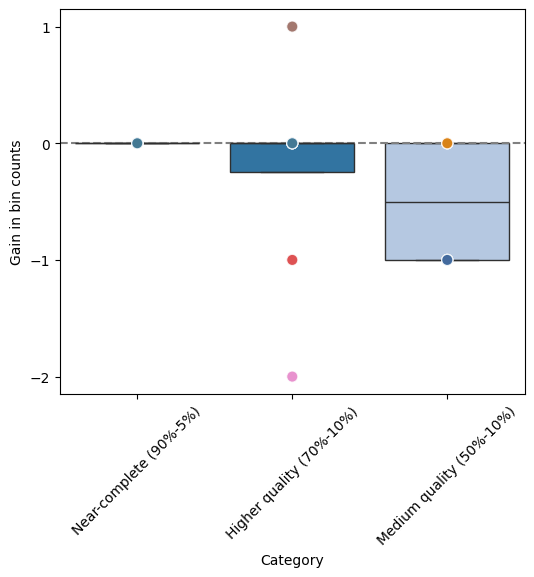

In [64]:
from matplotlib.ticker import MaxNLocator
ss_pooled = mags_counts[mags_counts['Dataset'] == 'strain pooled'].set_index('Tools')
ss_reassembly = mags_counts[mags_counts['Dataset'] == 'strain reassembly'].set_index('Tools')

ss_diff = ss_reassembly[['Near-complete (90%-5%)', 'Higher quality (70%-10%)', 'Medium quality (50%-10%)']] - \
          ss_pooled[['Near-complete (90%-5%)', 'Higher quality (70%-10%)', 'Medium quality (50%-10%)']]

# Reset index to make 'Tools' a column for plotting
ss_diff = ss_diff.reset_index().melt(id_vars='Tools', var_name='Category', value_name='Difference')

# Set up the plot
plt.figure(figsize=(6, 5))
sns.boxplot(data=ss_diff, x='Category', y='Difference', hue = 'Category',  palette=['#104e8b', '#1f77b4', '#aec7e8'], showfliers=False)
sns.stripplot(data=ss_diff, x='Category', y='Difference', hue = 'Tools', hue_order=tools_order, edgecolor='white', linewidth=0.8, size=8, jitter=False, dodge=False, alpha=0.8)
# Add labels and title
plt.axhline(0, color='gray', linewidth=1.5, linestyle='--')
plt.ylabel("Gain in bin counts")
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45)
plt.legend([], frameon=False)
plt.savefig('plots/reassembly_gain_strain.png', dpi=600, format='png', bbox_inches='tight')

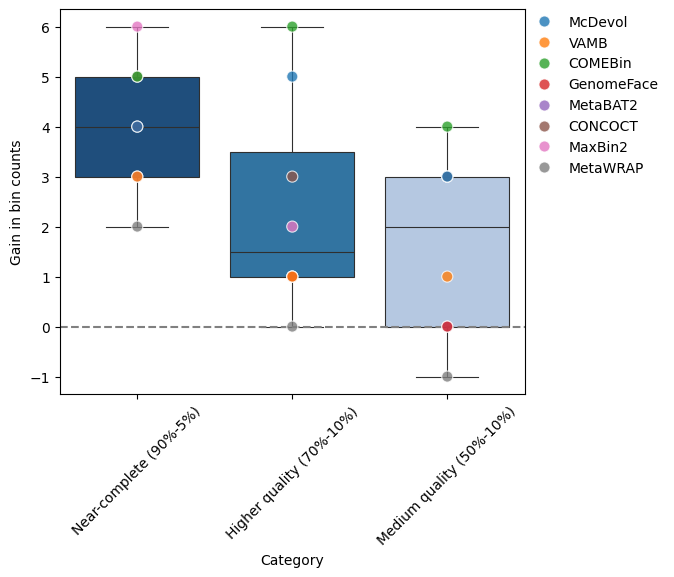

In [65]:
pl_pooled = mags_counts[mags_counts['Dataset'] == 'plant pooled'].set_index('Tools')
pl_reassembly = mags_counts[mags_counts['Dataset'] == 'plant reassembly'].set_index('Tools')

pl_diff = pl_reassembly[['Near-complete (90%-5%)', 'Higher quality (70%-10%)', 'Medium quality (50%-10%)']] - \
          pl_pooled[['Near-complete (90%-5%)', 'Higher quality (70%-10%)', 'Medium quality (50%-10%)']]

pl_diff = pl_diff.reset_index().melt(id_vars='Tools', var_name='Category', value_name='Difference')

# Set up the plot
plt.figure(figsize=(6, 5))
sns.boxplot(data=pl_diff, x='Category', y='Difference', hue = 'Category',  palette=['#104e8b', '#1f77b4', '#aec7e8'], showfliers=False, linewidth=0.8)
sns.stripplot(data=pl_diff, x='Category', y='Difference', hue = 'Tools', hue_order=tools_order, edgecolor='white', linewidth=0.8, size=8, jitter=False, dodge=False, alpha=0.8)
# Add labels and title
plt.axhline(0, color='gray', linewidth=1.5, linestyle='--')
plt.ylabel("Gain in bin counts")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0., frameon=False)

plt.savefig('plots/reassembly_gain_plant.png', dpi=600, format='png', bbox_inches='tight')

### Gold standard pooled assembly plots

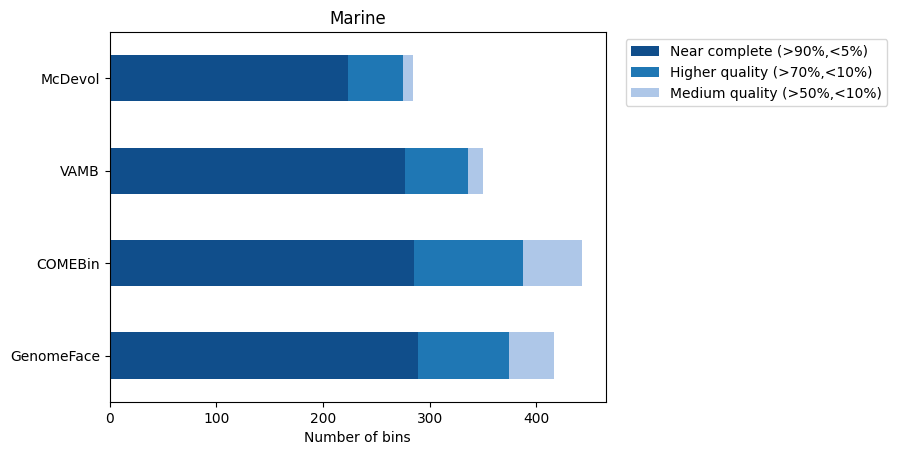

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
colors = ['#104e8b', '#1f77b4', '#aec7e8']

gsmags_counts = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/goldstandard_pooled_checkm2.csv', header=0, sep='\t')
gsmags_counts.index = gsmags_counts['Tools']
gsmags_counts = gsmags_counts.iloc[::-1]

# Pooled assembly
gsma_pooled = gsmags_counts.loc[gsmags_counts['Dataset']=='Marine']

gsplot_data = gsma_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
gsplot_data.plot.barh(stacked=True, color=colors)
plt.title('Marine')
plt.xlabel('bin counts')
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('gspooled_assembly_marine.png', dpi=600, format='png', bbox_inches='tight')


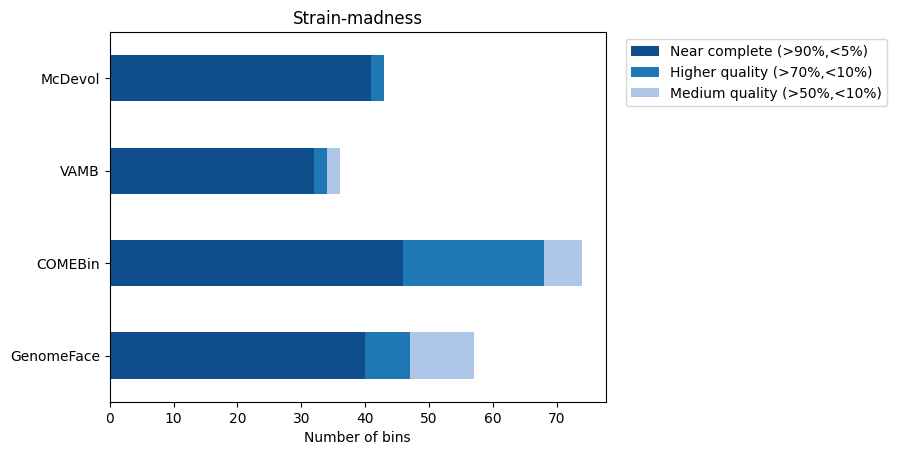

In [187]:
gsss_pooled = gsmags_counts.loc[gsmags_counts['Dataset']=='Strain-madness']

gsplot_data = gsss_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
gsplot_data.plot.barh(stacked=True, color=colors)
plt.title('Strain-madness')
plt.xlabel('bin counts')
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('gspooled_assembly_strain.png', dpi=600, format='png', bbox_inches='tight')

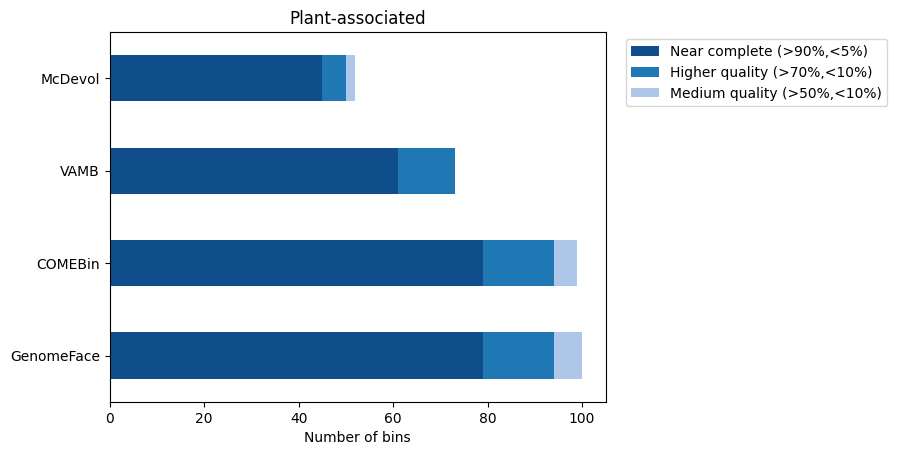

In [186]:
gspl_pooled = gsmags_counts.loc[gsmags_counts['Dataset']=='Plant-associated']

gsplot_data = gspl_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
gsplot_data.plot.barh(stacked=True, color=colors)
plt.title('Plant-associated')
plt.xlabel('bin counts')
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('gspooled_assembly_plant.png', dpi=600, format='png', bbox_inches='tight')

### AMBER assessment

        Tools     Marine  Strain-madness  Plant-associated
0     McDevol  88.566956       63.818027         44.046410
1        VAMB  83.888578       41.876417         53.811366
2     COMEBin  86.240785       61.873441         63.768679
3  GenomeFace  90.450494       61.386054         66.084821


/tmp/ipykernel_2901976/2670107708.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


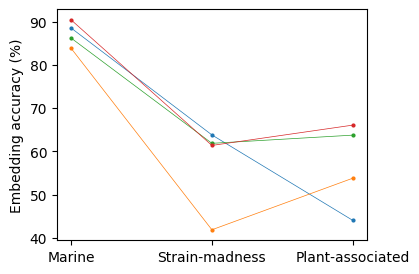

In [51]:
# embedding accuracy
import matplotlib.pyplot as plt
import pandas as pd

accuracy = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/LinearClassifier_accuracy.csv', header=0, sep='\t')
# Data
tools = ['McDevol', 'VAMB', 'COMEBin', 'GenomeFace']
datasets = ['Marine', 'Strain-madness', 'Plant-associated']
print(accuracy)
# accuracy = [
#     [88.5669560596346, 63.8180272108844, 44.0464102960657],  # McDevol
#     [83.8885779874142, 41.8764172335601, 53.811365779497],  # VAMB
#     [86.2407848361066, 61.8734406894988, 63.768679000533],  # COMEBin
#     [90.4504936643083, 61.3860544217687, 66.0848208130665]  # GenomeFace
# ]

# # Create the plot
plt.figure(figsize=(4, 3))

# Plot the accuracies
for i, tool in enumerate(tools):
    plt.plot(datasets, accuracy.iloc[i,1:], marker='o', markersize=2, linewidth=0.5)

# # Add labels and title
# plt.xlabel('Dataset')
plt.ylabel('Embedding accuracy (%)')
# plt.title('Accuracy of Different Tools on Different Datasets')
plt.legend(frameon=False)
# plt.savefig('/home/yazhini/work/binning_benchmarking/plots/embedding_accuracy.png', facecolor='white', format='png', dpi=600, bbox_inches='tight')


        Tools    Marine  Strain-madness  Plant-associated
0     McDevol  0.522645        0.255906          0.240933
1        VAMB  0.554409        0.223139          0.241766
2     COMEBin  0.693241        0.422782          0.401695
3  GenomeFace  0.631553        0.481621          0.349783


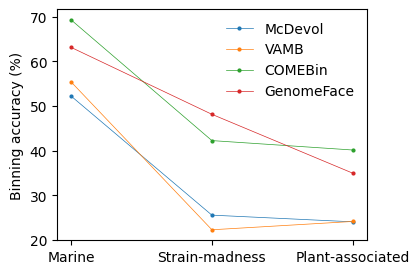

In [54]:
# clustering accuracy
import matplotlib.pyplot as plt
import pandas as pd

accuracy = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/AMBER_accuracy.csv', header=0, sep='\t')
# Data
tools = ['McDevol', 'VAMB', 'COMEBin', 'GenomeFace']
datasets = ['Marine', 'Strain-madness', 'Plant-associated']
print(accuracy)
# accuracy = [
#     [88.5669560596346, 63.8180272108844, 44.0464102960657],  # McDevol
#     [83.8885779874142, 41.8764172335601, 53.811365779497],  # VAMB
#     [86.2407848361066, 61.8734406894988, 63.768679000533],  # COMEBin
#     [90.4504936643083, 61.3860544217687, 66.0848208130665]  # GenomeFace
# ]

# # Create the plot
plt.figure(figsize=(4, 3))

# Plot the accuracies
for i, tool in enumerate(tools):
    plt.plot(datasets, accuracy.iloc[i,1:]*100, marker='o', label=tool, markersize=2, linewidth=0.5)

# # Add labels and title
# plt.xlabel('Dataset')
plt.ylabel('Binning accuracy (%)')
# plt.title('Accuracy of Different Tools on Different Datasets')
plt.legend(frameon=False)
plt.savefig('/home/yazhini/work/binning_benchmarking/plots/binning_accuracy.png', facecolor='white', format='png', dpi=600, bbox_inches='tight')


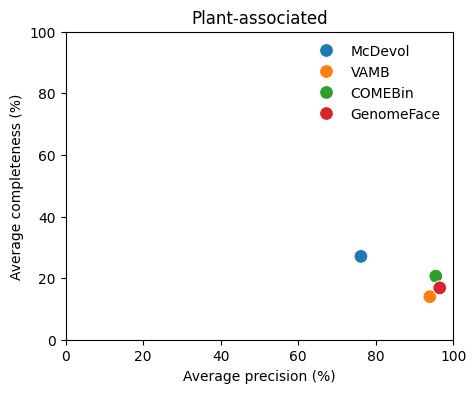

In [53]:
# completeness (bp) and purity (bp)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
path="/home/yazhini/work/binning_benchmarking/results/"
comp_purity = pd.read_csv(path + 'AMBER_average_purity_completeness_bp.csv', header=0, sep='\t')
ma_comp_purity = comp_purity.loc[comp_purity['Dataset'].str.contains('Marine')]
ss_comp_purity = comp_purity.loc[comp_purity['Dataset'].str.contains('Strain-madness')]
pl_comp_purity = comp_purity.loc[comp_purity['Dataset'].str.contains('Plant-associated')]

plt.figure(figsize=(5, 4))
# sns.scatterplot(
#     data=ma_comp_purity,
#     x=ma_comp_purity['precision_avg_bp'] * 100,
#     y=ma_comp_purity['recall_avg_bp'] * 100,
#     hue='Tool',
#     s=80,
#     legend=False
# )


# sns.scatterplot(
#     data=ss_comp_purity,
#     x=ss_comp_purity['precision_avg_bp'] * 100,
#     y=ss_comp_purity['recall_avg_bp'] * 100,
#     hue='Tool',
#     s=100,
#     legend=False
# )

sns.scatterplot(
    data=pl_comp_purity,
    x=pl_comp_purity['precision_avg_bp'] * 100,
    y=pl_comp_purity['recall_avg_bp'] * 100,
    hue='Tool',
    s=100,
    # legend=False
)


# Set plot limits and labels
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel("Average precision (%)")
plt.ylabel("Average completeness (%)")
# plt.title("Marine")
# plt.title("Strain-madness")
plt.title("Plant-associated")
plt.legend()
plt.legend(frameon=False)
plt.savefig('/home/yazhini/work/binning_benchmarking/plots/plant_average_purity_completeness_bp.png', facecolor='white', format='png', dpi=600, bbox_inches='tight')

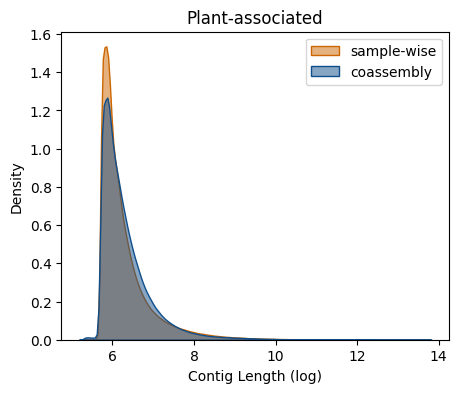

In [50]:
# length distribution
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import seaborn as sns
# # Sample data: lengths
# path="/home/yazhini/work/Results_binning_benchmarking/"
# pooled_lengths = pd.read_csv(path + 'marine_pooled_contiglength', header=None, sep='\t')
# pooled_lengths = pooled_lengths[1].to_numpy()
# multisplit_lengths = pd.read_csv(path + 'marine_multisplit_contiglength', header=None, sep='\t')
# multisplit_lengths = multisplit_lengths[1].to_numpy()
# colors = ['#104e8b', '#cc6600']
# plt.figure(figsize=(5, 4))
# sns.kdeplot(np.log(multisplit_lengths), color=colors[1], fill=True, alpha=0.5)
# sns.kdeplot(np.log(pooled_lengths), color=colors[0], fill=True, alpha=0.5)
# plt.title('Marine')
# plt.xlabel('Contig Length (log)')
# plt.ylabel('Density')
# plt.legend(['sample-wise', 'coassembly'])
# plt.savefig(path + 'marine_length.png', facecolor='white', format='png', dpi=600, bbox_inches='tight')


# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import seaborn as sns
# # Sample data: lengths
# path="/home/yazhini/work/Results_binning_benchmarking/"
# pooled_lengths = pd.read_csv(path + 'strain_pooled_contiglength', header=None, sep='\t')
# pooled_lengths = pooled_lengths[1].to_numpy()
# multisplit_lengths = pd.read_csv(path + 'strain_multisplit_contiglength', header=None, sep='\t')
# multisplit_lengths = multisplit_lengths[1].to_numpy()
# colors = ['#104e8b', '#cc6600']
# plt.figure(figsize=(5, 4))
# sns.kdeplot(np.log(multisplit_lengths), color=colors[1], fill=True, alpha=0.5)
# sns.kdeplot(np.log(pooled_lengths), color=colors[0], fill=True, alpha=0.5)
# plt.title('Strain-madness')
# plt.xlabel('Contig Length (log)')
# plt.ylabel('Density')
# plt.legend(['sample-wise', 'coassembly'])
# plt.savefig(path + 'strain_length.png', facecolor='white', format='png', dpi=600, bbox_inches='tight')

# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import seaborn as sns
# # Sample data: lengths
# path="/home/yazhini/work/Results_binning_benchmarking/"
# pooled_lengths = pd.read_csv(path + 'plant_pooled_contiglength', header=None, sep='\t')
# pooled_lengths = pooled_lengths[1].to_numpy()
# multisplit_lengths = pd.read_csv(path + 'plant_multisplit_contiglength', header=None, sep='\t')
# multisplit_lengths = multisplit_lengths[1].to_numpy()
# colors = ['#104e8b', '#cc6600']
# plt.figure(figsize=(5, 4))
# sns.kdeplot(np.log(multisplit_lengths), color=colors[1], fill=True, alpha=0.5)
# sns.kdeplot(np.log(pooled_lengths), color=colors[0], fill=True, alpha=0.5)
# plt.title('Plant-associated')
# plt.xlabel('Contig Length (log)')
# plt.ylabel('Density')
# plt.legend(['sample-wise', 'coassembly'])
# plt.savefig(path + 'plant_length.png', facecolor='white', format='png', dpi=600, bbox_inches='tight')

Text(0, 0.5, '')

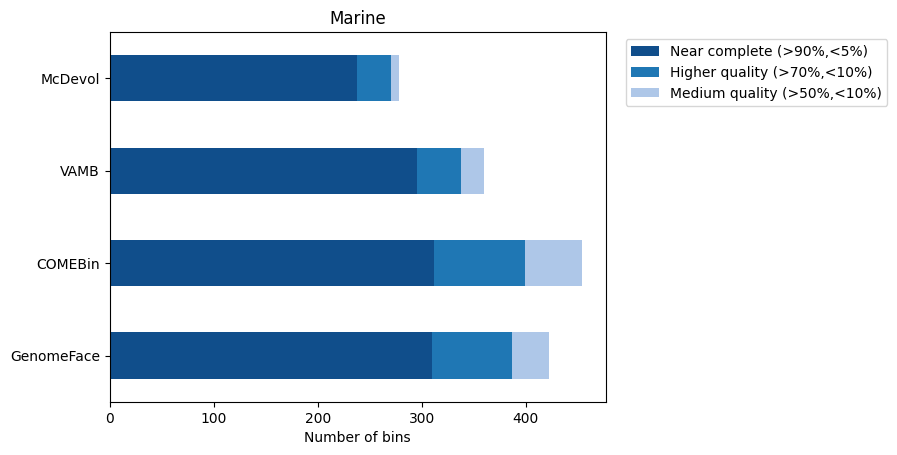

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
colors = ['#104e8b', '#1f77b4', '#aec7e8']

gsmags_counts = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/goldstandard_pooled_amber.csv', header=0, sep='\t')
gsmags_counts.index = gsmags_counts['Tools']
gsmags_counts = gsmags_counts.iloc[::-1]
gsmags_counts
# Pooled assembly
gsma_pooled = gsmags_counts.loc[gsmags_counts['Dataset']=='Marine']

gsplot_data = gsma_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
gsplot_data.plot.barh(stacked=True, color=colors)
plt.title('Marine')
plt.xlabel('bin counts')
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('amber_gspooled_assembly_marine.png', dpi=600, format='png', bbox_inches='tight')


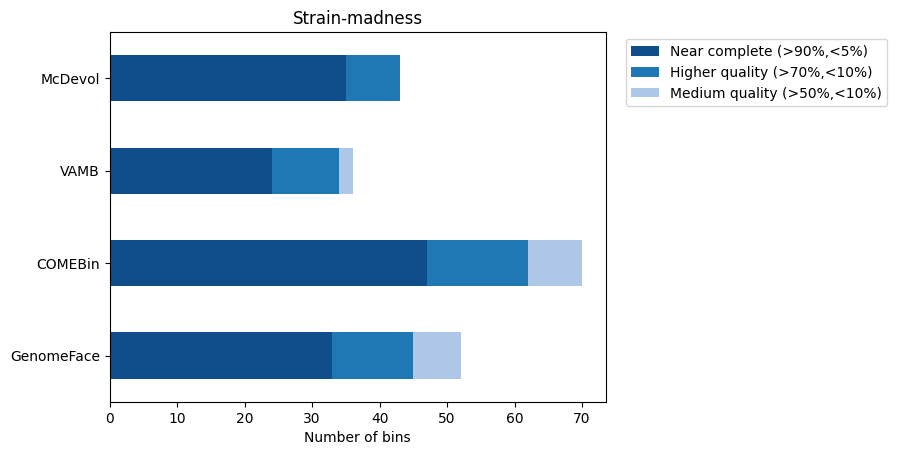

In [189]:
gsss_pooled = gsmags_counts.loc[gsmags_counts['Dataset']=='Strain-madness']

gsplot_data = gsss_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
gsplot_data.plot.barh(stacked=True, color=colors)
plt.title('Strain-madness')
plt.xlabel('bin counts')
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('amber_gspooled_assembly_strain.png', dpi=600, format='png', bbox_inches='tight')

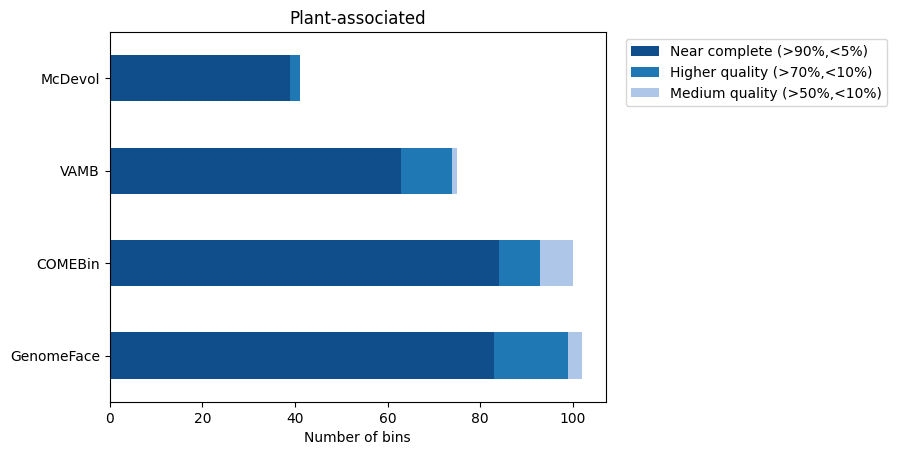

In [190]:
gspl_pooled = gsmags_counts.loc[gsmags_counts['Dataset']=='Plant-associated']

gsplot_data = gspl_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
gsplot_data.plot.barh(stacked=True, color=colors)
plt.title('Plant-associated')
plt.xlabel('bin counts')
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('amber_gspooled_assembly_plant.png', dpi=600, format='png', bbox_inches='tight')

### Time and memory usage (megahit pooled assembly)

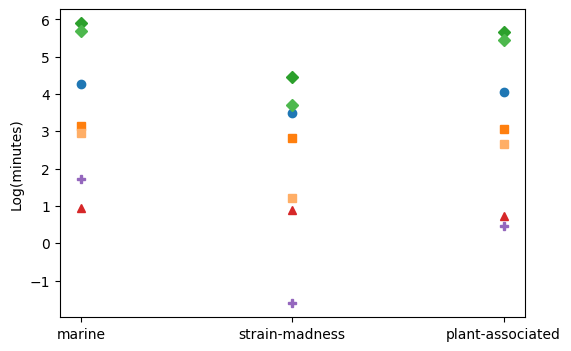

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

time_memory = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/time_memory_usage_pooled_plot',  header=0, sep='\t')
tools = time_memory['Tools'].unique()
datasets = time_memory['Datasets'].unique()

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
markers = ['o', 's', 's', 'D', 'D', '^', 'P']
colors = ['#1f77b4', '#ff7f0e', '#ffae66', '#2ca02c', '#4db84d','#d62728', '#9467bd']
# Plotting Time Data
for i, tool in enumerate(tools):
    time_data = time_memory[time_memory['Tools'] == tool]['Time (minutes)']
    ax.plot(datasets, np.log(time_data), marker=markers[i], label=tool, color = colors[i], linewidth=0.0)
ax.set_ylabel('Log(minutes)')
plt.savefig('plots/time_requirement_mapooled.png', dpi=600, format='png', bbox_inches='tight')

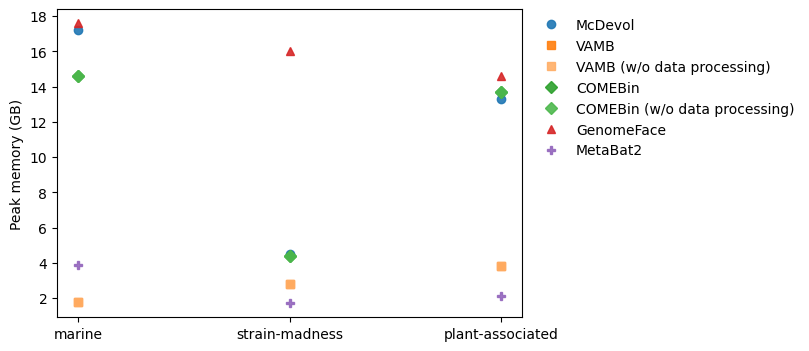

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
markers = ['o', 's', 's', 'D', 'D', '^', 'P']
colors = ['#1f77b4', '#ff7f0e', '#ffae66', '#2ca02c', '#4db84d', '#d62728', '#9467bd']
# Plotting Time Data
for i, tool in enumerate(tools):
    memory_data = time_memory[time_memory['Tools'] == tool]['Memory (GB)']
    ax.plot(datasets, memory_data, marker=markers[i], label=tool, color = colors[i], linewidth=0.0, alpha=0.9)
ax.set_ylabel('Peak memory (GB)')
ax.legend(loc=(1.02,0.5),frameon=False)
plt.savefig('plots/memory_requirement_mapooled.png', dpi=600, format='png', bbox_inches='tight')

### single vs multi-sample assembly binning

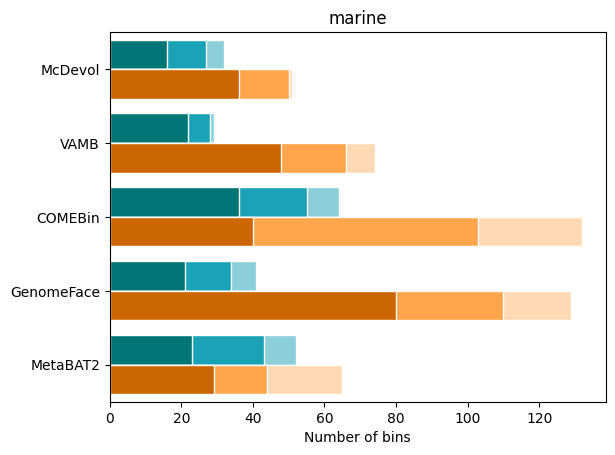

In [22]:
# marine
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/single_vs_multisample_binning', header=0, sep='\t')
mags_counts_ma = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('marine single|marine multisample nr')]
mags_counts_ma.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_ma.index.get_level_values(0).unique()
mags_counts_maplot = mags_counts_ma.reindex(tools_order[::-1], level=0)
mags_counts_maplot = mags_counts_maplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'COMEBin', 'GenomeFace', 'MetaBat2']

fig, ax = plt.subplots()

bar_width = 0.4
bar_gap = 0.05

colors = ['#007575', '#1AA3B6', '#8CCFD8']
colors_ms = ['#cc6600', '#ffa64d', '#ffd9b3']


y_pos = range(len(mags_counts_maplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]

(mags_counts_maplot['Near-complete (90%-5%)']['marine single'] +
 mags_counts_maplot['Higher']['marine single'] +
 mags_counts_maplot['Medium']['marine single']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine single'] +
mags_counts_maplot['Higher']['marine single']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine single']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine multisample nr'] +
 mags_counts_maplot['Higher']['marine multisample nr'] +
 mags_counts_maplot['Medium']['marine multisample nr']).plot(
    kind='barh', color=colors_ms[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine multisample nr'] +
 mags_counts_maplot['Higher']['marine multisample nr']).plot(
    kind='barh', color=colors_ms[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine multisample nr']).plot(
    kind='barh', color=colors_ms[0], width=bar_width, ax=ax, position=1, edgecolor='white')

# Customize plot appearance
# plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('marine')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 4.5)

plt.savefig('plots/single_vs_multi_marine_amber.png', dpi=600, format='png', bbox_inches='tight')


(-0.5, 4.5)

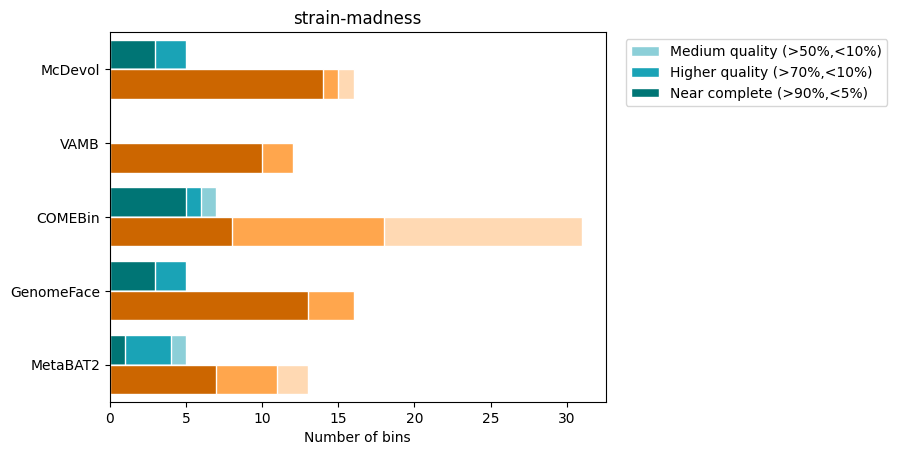

In [23]:
# strain
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/single_vs_multisample_binning', header=0, sep='\t')
mags_counts_ss = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('strain single|strain multisample nr')]
mags_counts_ss.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_ss.index.get_level_values(0).unique()
mags_counts_ssplot = mags_counts_ss.reindex(tools_order[::-1], level=0)
mags_counts_ssplot = mags_counts_ssplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'COMEBin', 'GenomeFace', 'MetaBat2']

fig, ax = plt.subplots()

bar_width = 0.4
bar_gap = 0.05

colors = ['#007575', '#1AA3B6', '#8CCFD8']
colors_ms = ['#cc6600', '#ffa64d', '#ffd9b3']


y_pos = range(len(mags_counts_ssplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]

(mags_counts_ssplot['Near-complete (90%-5%)']['strain single'] +
 mags_counts_ssplot['Higher']['strain single'] +
 mags_counts_ssplot['Medium']['strain single']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain single'] +
mags_counts_ssplot['Higher']['strain single']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain single']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain multisample nr'] +
 mags_counts_ssplot['Higher']['strain multisample nr'] +
 mags_counts_ssplot['Medium']['strain multisample nr']).plot(
    kind='barh', color=colors_ms[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain multisample nr'] +
 mags_counts_ssplot['Higher']['strain multisample nr']).plot(
    kind='barh', color=colors_ms[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain multisample nr']).plot(
    kind='barh', color=colors_ms[0], width=bar_width, ax=ax, position=1, edgecolor='white')

# Customize plot appearance
plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'][::-1], loc=(1.04, 0.8))
plt.title('strain-madness')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 4.5)

# plt.savefig('plots/single_vs_multi_strain_amber.png', dpi=600, format='png', bbox_inches='tight')


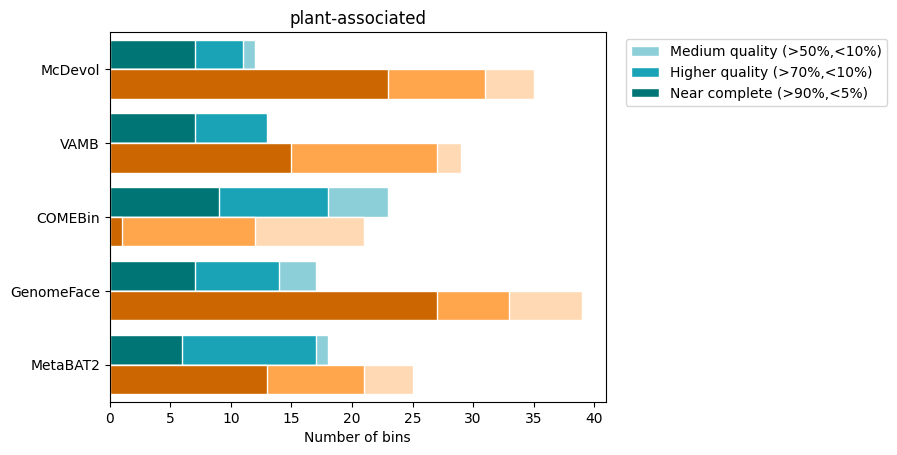

In [25]:
# plant
# plant
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/single_vs_multisample_binning', header=0, sep='\t')
mags_counts_pl = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('plant single|plant multisample nr')]
mags_counts_pl.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_pl.index.get_level_values(0).unique()
mags_counts_plplot = mags_counts_pl.reindex(tools_order[::-1], level=0)
mags_counts_plplot = mags_counts_plplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'COMEBin', 'GenomeFace', 'MetaBat2']

fig, ax = plt.subplots()

bar_width = 0.4
bar_gap = 0.05

colors = ['#007575', '#1AA3B6', '#8CCFD8']
colors_ms = ['#cc6600', '#ffa64d', '#ffd9b3']


y_pos = range(len(mags_counts_plplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]

(mags_counts_plplot['Near-complete (90%-5%)']['plant single'] +
 mags_counts_plplot['Higher']['plant single'] +
 mags_counts_plplot['Medium']['plant single']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant single'] +
mags_counts_plplot['Higher']['plant single']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant single']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant multisample nr'] +
 mags_counts_plplot['Higher']['plant multisample nr'] +
 mags_counts_plplot['Medium']['plant multisample nr']).plot(
    kind='barh', color=colors_ms[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant multisample nr'] +
 mags_counts_plplot['Higher']['plant multisample nr']).plot(
    kind='barh', color=colors_ms[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant multisample nr']).plot(
    kind='barh', color=colors_ms[0], width=bar_width, ax=ax, position=1, edgecolor='white')

# Customize plot appearance
plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'][::-1], loc=(1.04, 0.8))
plt.title('plant-associated')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 4.5)

plt.savefig('plots/single_vs_multi_plant_amber.png', dpi=600, format='png', bbox_inches='tight')


### Multi-sample binning assessment AMBER

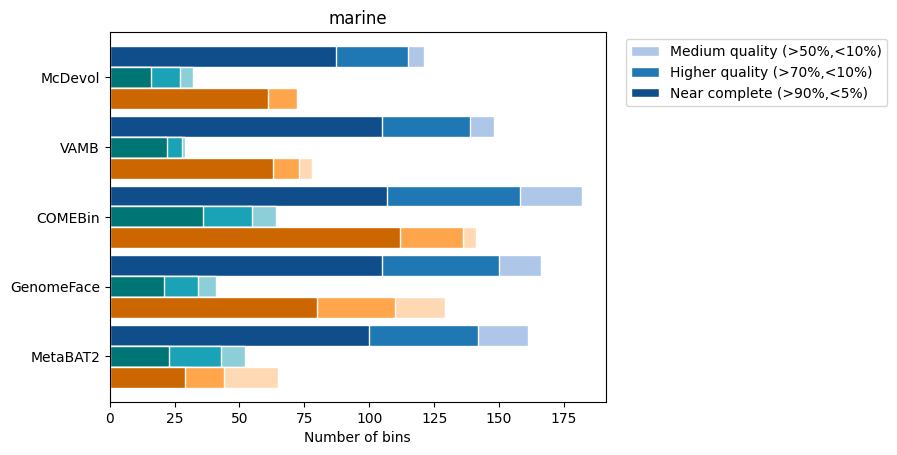

In [24]:
# marine
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/pooled_vs_single_vs_multisamplenonredundant', header=0, sep='\t')
mags_counts_ma = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('marine pooled|marine single|marine multisample nr')]
mags_counts_ma.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_ma.index.get_level_values(0).unique()
mags_counts_maplot = mags_counts_ma.reindex(tools_order[::-1], level=0)
mags_counts_maplot = mags_counts_maplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'COMEBin','GenomeFace', 'MetaBat2']

fig, ax = plt.subplots()

bar_width = 0.3
bar_gap = 0.05

colors = ['#104e8b', '#1f77b4', '#aec7e8']
colors_ss = ['#007575', '#1AA3B6', '#8CCFD8']
colors_ms = ['#cc6600', '#ffa64d', '#ffd9b3']

y_pos = range(len(mags_counts_maplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set
y_pos_pooled_shifted = [pos + 2 *(bar_width + bar_gap) for pos in y_pos] 

(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled'] +
 mags_counts_maplot['Higher']['marine pooled'] +
 mags_counts_maplot['Medium']['marine pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled'] +
mags_counts_maplot['Higher']['marine pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine single'] +
 mags_counts_maplot['Higher']['marine single'] +
 mags_counts_maplot['Medium']['marine single']).plot(
    kind='barh', color=colors_ss[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine single'] +
mags_counts_maplot['Higher']['marine single']).plot(
    kind='barh', color=colors_ss[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine single']).plot(
    kind='barh', color=colors_ss[0], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine multisample nr'] +
 mags_counts_maplot['Higher']['marine multisample nr'] +
 mags_counts_maplot['Medium']['marine multisample nr']).plot(
    kind='barh', color=colors_ms[2], width=bar_width, ax=ax, position=2, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine multisample nr'] +
 mags_counts_maplot['Higher']['marine multisample nr']).plot(
    kind='barh', color=colors_ms[1], width=bar_width, ax=ax, position=2, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine multisample nr']).plot(
    kind='barh', color=colors_ms[0], width=bar_width, ax=ax, position=2, edgecolor='white')

ax.set_yticks([pos - 0.5 * (bar_width) for pos in y_pos])
ax.set_yticklabels(mags_counts_maplot.index.get_level_values(0).unique())

plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'][::-1], loc=(1.04, 0.8))
plt.title('marine')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.8, 4.5)

plt.savefig('plots/pooled_single_multisample_nr_marine_amber.png', dpi=600, format='png', bbox_inches='tight')


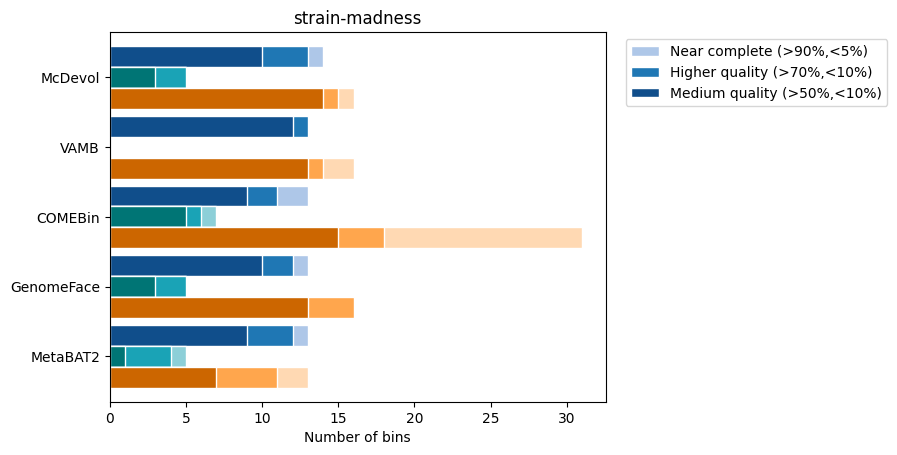

In [56]:
# strain
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/pooled_vs_single_vs_multisamplenonredundant', header=0, sep='\t')
mags_counts_ss = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('strain pooled|strain single|strain multisample nr')]
mags_counts_ss.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_ss.index.get_level_values(0).unique()
mags_counts_ssplot = mags_counts_ss.reindex(tools_order[::-1], level=0)
mags_counts_ssplot = mags_counts_ssplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'COMEBin','GenomeFace', 'MetaBat2']

fig, ax = plt.subplots()

bar_width = 0.3
bar_gap = 0.05

colors = ['#104e8b', '#1f77b4', '#aec7e8']
colors_ss = ['#007575', '#1AA3B6', '#8CCFD8']
colors_ms = ['#cc6600', '#ffa64d', '#ffd9b3']

y_pos = range(len(mags_counts_ssplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set
y_pos_pooled_shifted = [pos + 2 *(bar_width + bar_gap) for pos in y_pos] 

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled'] +
 mags_counts_ssplot['Higher']['strain pooled'] +
 mags_counts_ssplot['Medium']['strain pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled'] +
mags_counts_ssplot['Higher']['strain pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain single'] +
 mags_counts_ssplot['Higher']['strain single'] +
 mags_counts_ssplot['Medium']['strain single']).plot(
    kind='barh', color=colors_ss[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain single'] +
mags_counts_ssplot['Higher']['strain single']).plot(
    kind='barh', color=colors_ss[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain single']).plot(
    kind='barh', color=colors_ss[0], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain multisample nr'] +
 mags_counts_ssplot['Higher']['strain multisample nr'] +
 mags_counts_ssplot['Medium']['strain multisample nr']).plot(
    kind='barh', color=colors_ms[2], width=bar_width, ax=ax, position=2, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain multisample nr'] +
 mags_counts_ssplot['Higher']['strain multisample nr']).plot(
    kind='barh', color=colors_ms[1], width=bar_width, ax=ax, position=2, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain multisample nr']).plot(
    kind='barh', color=colors_ms[0], width=bar_width, ax=ax, position=2, edgecolor='white')

ax.set_yticks([pos - 0.5 * (bar_width) for pos in y_pos])
ax.set_yticklabels(mags_counts_ssplot.index.get_level_values(0).unique())

plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('strain-madness')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.8, 4.5)

plt.savefig('plots/pooled_single_multisample_nr_strain_amber.png', dpi=600, format='png', bbox_inches='tight')


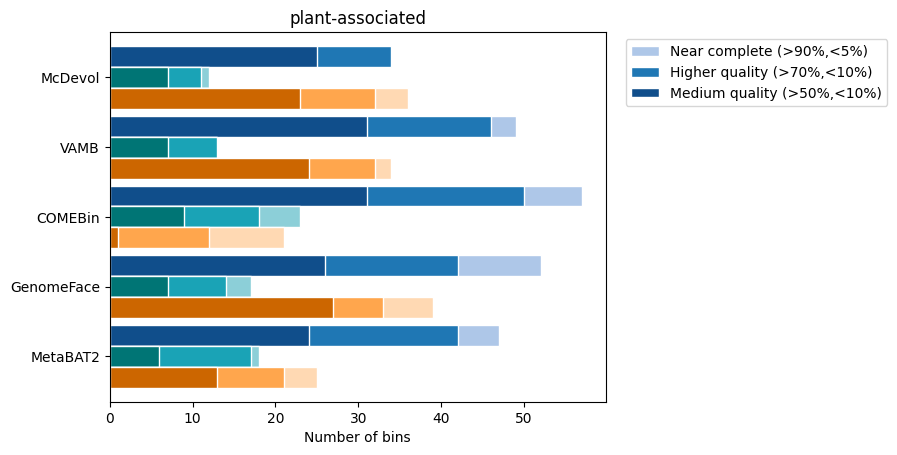

In [57]:
# plant
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/pooled_vs_single_vs_multisamplenonredundant', header=0, sep='\t')
mags_counts_pl = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('plant pooled|plant single|plant multisample nr')]
mags_counts_pl.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_pl.index.get_level_values(0).unique()
mags_counts_plplot = mags_counts_pl.reindex(tools_order[::-1], level=0)
mags_counts_plplot = mags_counts_plplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'COMEBin','GenomeFace', 'MetaBat2']

fig, ax = plt.subplots()

bar_width = 0.3
bar_gap = 0.05

colors = ['#104e8b', '#1f77b4', '#aec7e8']
colors_ss = ['#007575', '#1AA3B6', '#8CCFD8']
colors_ms = ['#cc6600', '#ffa64d', '#ffd9b3']

y_pos = range(len(mags_counts_plplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set
y_pos_pooled_shifted = [pos + 2 *(bar_width + bar_gap) for pos in y_pos] 

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled'] +
 mags_counts_plplot['Higher']['plant pooled'] +
 mags_counts_plplot['Medium']['plant pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled'] +
mags_counts_plplot['Higher']['plant pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant single'] +
 mags_counts_plplot['Higher']['plant single'] +
 mags_counts_plplot['Medium']['plant single']).plot(
    kind='barh', color=colors_ss[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant single'] +
mags_counts_plplot['Higher']['plant single']).plot(
    kind='barh', color=colors_ss[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant single']).plot(
    kind='barh', color=colors_ss[0], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant multisample nr'] +
 mags_counts_plplot['Higher']['plant multisample nr'] +
 mags_counts_plplot['Medium']['plant multisample nr']).plot(
    kind='barh', color=colors_ms[2], width=bar_width, ax=ax, position=2, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant multisample nr'] +
 mags_counts_plplot['Higher']['plant multisample nr']).plot(
    kind='barh', color=colors_ms[1], width=bar_width, ax=ax, position=2, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant multisample nr']).plot(
    kind='barh', color=colors_ms[0], width=bar_width, ax=ax, position=2, edgecolor='white')

ax.set_yticks([pos - 0.5 * (bar_width) for pos in y_pos])
ax.set_yticklabels(mags_counts_plplot.index.get_level_values(0).unique())

plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('plant-associated')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.8, 4.5)

plt.savefig('plots/pooled_single_multisample_nr_plant_amber.png', dpi=600, format='png', bbox_inches='tight')


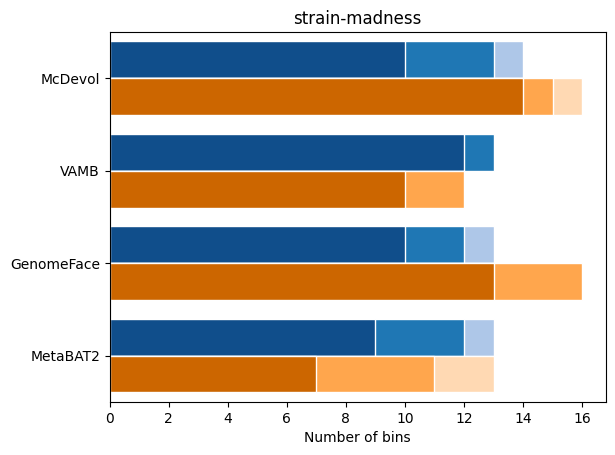

In [13]:
# strain-madness
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/pooled_vs_multisamplenonredundant_amberassessment', header=0, sep='\t')

mags_counts_ss = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('strain pooled|strain multisample nr')]
mags_counts_ss.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_ss.index.get_level_values(0).unique()
mags_counts_ssplot = mags_counts_ss.reindex(tools_order[::-1], level=0)
mags_counts_ssplot = mags_counts_ssplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'GenomeFace', 'MetaBat2']

fig, ax = plt.subplots()

bar_width = 0.4
bar_gap = 0.05

colors = ['#104e8b', '#1f77b4', '#aec7e8']
colors_ms = ['#cc6600', '#ffa64d', '#ffd9b3']

y_pos = range(len(mags_counts_ssplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled'] +
 mags_counts_ssplot['Higher']['strain pooled'] +
 mags_counts_ssplot['Medium']['strain pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled'] +
mags_counts_ssplot['Higher']['strain pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain multisample nr'] +
 mags_counts_ssplot['Higher']['strain multisample nr'] +
 mags_counts_ssplot['Medium']['strain multisample nr']).plot(
    kind='barh', color=colors_ms[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain multisample nr'] +
 mags_counts_ssplot['Higher']['strain multisample nr']).plot(
    kind='barh', color=colors_ms[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain multisample nr']).plot(
    kind='barh', color=colors_ms[0], width=bar_width, ax=ax, position=1, edgecolor='white')

plt.title('strain-madness')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 3.5)


plt.savefig('plots/pooled_multisample_nr_strain_amber.png', dpi=600, format='png', bbox_inches='tight')


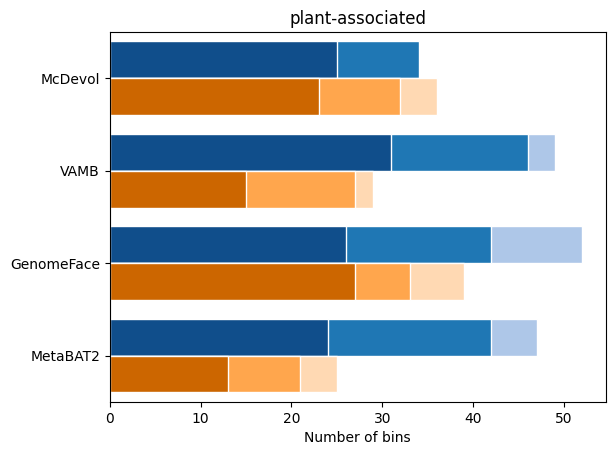

In [14]:
# plant_associated
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/pooled_vs_multisamplenonredundant_amberassessment', header=0, sep='\t')

mags_counts_pl = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('plant pooled|plant multisample nr')]
mags_counts_pl.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_pl.index.get_level_values(0).unique()
mags_counts_plplot = mags_counts_pl.reindex(tools_order[::-1], level=0)
mags_counts_plplot = mags_counts_plplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'GenomeFace', 'MetaBat2']

fig, ax = plt.subplots()

bar_width = 0.4
bar_gap = 0.05

colors = ['#104e8b', '#1f77b4', '#aec7e8']
colors_ms = ['#cc6600', '#ffa64d', '#ffd9b3']

y_pos = range(len(mags_counts_plplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled'] +
 mags_counts_plplot['Higher']['plant pooled'] +
 mags_counts_plplot['Medium']['plant pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled'] +
mags_counts_plplot['Higher']['plant pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant multisample nr'] +
 mags_counts_plplot['Higher']['plant multisample nr'] +
 mags_counts_plplot['Medium']['plant multisample nr']).plot(
    kind='barh', color=colors_ms[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant multisample nr'] +
 mags_counts_plplot['Higher']['plant multisample nr']).plot(
    kind='barh', color=colors_ms[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant multisample nr']).plot(
    kind='barh', color=colors_ms[0], width=bar_width, ax=ax, position=1, edgecolor='white')

plt.title('plant-associated')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 3.5)
plt.savefig('plots/pooled_multisample_nr_plant_amber.png', dpi=600, format='png', bbox_inches='tight')


### Cluster and split vs split and cluster

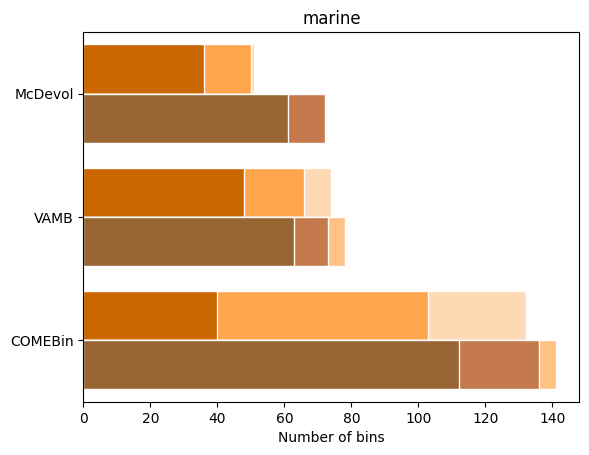

In [32]:
# plant_associated
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/multisample_cluster_split_vs_split_cluster.csv', header=0, sep='\t')

mags_counts_pl = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('marine_cluster_split|marine_split_cluster')]
mags_counts_pl.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_pl.index.get_level_values(0).unique()
mags_counts_plplot = mags_counts_pl.reindex(tools_order[::-1], level=0)
mags_counts_plplot = mags_counts_plplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'COMEBin']

fig, ax = plt.subplots()

bar_width = 0.4
bar_gap = 0.05

colors_cs = ['#cc6600', '#ffa64d', '#ffd9b3']
colors_sc = ['#996633', '#c47a4d', '#ffc285']

y_pos = range(len(mags_counts_plplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]

(mags_counts_plplot['Near-complete (90%-5%)']['marine_cluster_split'] +
 mags_counts_plplot['Higher']['marine_cluster_split'] +
 mags_counts_plplot['Medium']['marine_cluster_split']).plot(
    kind='barh', color=colors_cs[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['marine_cluster_split'] +
mags_counts_plplot['Higher']['marine_cluster_split']).plot(
    kind='barh', color=colors_cs[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['marine_cluster_split']).plot(
    kind='barh', color=colors_cs[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['marine_split_cluster'] +
 mags_counts_plplot['Higher']['marine_split_cluster'] +
 mags_counts_plplot['Medium']['marine_split_cluster']).plot(
    kind='barh', color=colors_sc[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['marine_split_cluster'] +
 mags_counts_plplot['Higher']['marine_split_cluster']).plot(
    kind='barh', color=colors_sc[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['marine_split_cluster']).plot(
    kind='barh', color=colors_sc[0], width=bar_width, ax=ax, position=1, edgecolor='white')

plt.title('marine')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 2.5)


plt.savefig('plots/marine_cluster_split.png', dpi=600, format='png', bbox_inches='tight')

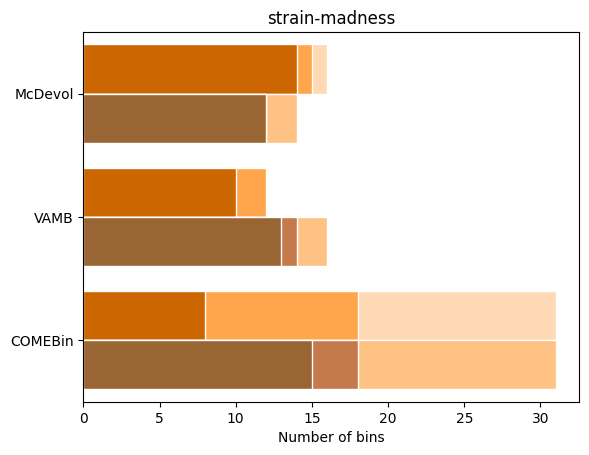

In [33]:
# plant_associated
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/multisample_cluster_split_vs_split_cluster.csv', header=0, sep='\t')

mags_counts_pl = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('strain_cluster_split|strain_split_cluster')]
mags_counts_pl.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_pl.index.get_level_values(0).unique()
mags_counts_plplot = mags_counts_pl.reindex(tools_order[::-1], level=0)
mags_counts_plplot = mags_counts_plplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'COMEBin']

fig, ax = plt.subplots()

# Set bar width and gap size
bar_width = 0.4
bar_gap = 0.05  # Gap between the pairs

colors_cs = ['#cc6600', '#ffa64d', '#ffd9b3']
colors_sc = ['#996633', '#c47a4d', '#ffc285']

# Calculate positions for each bar
y_pos = range(len(mags_counts_plplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set

# Plot the stacked bar segments for "strain_cluster_split"
(mags_counts_plplot['Near-complete (90%-5%)']['strain_cluster_split'] +
 mags_counts_plplot['Higher']['strain_cluster_split'] +
 mags_counts_plplot['Medium']['strain_cluster_split']).plot(
    kind='barh', color=colors_cs[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['strain_cluster_split'] +
mags_counts_plplot['Higher']['strain_cluster_split']).plot(
    kind='barh', color=colors_cs[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['strain_cluster_split']).plot(
    kind='barh', color=colors_cs[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['strain_split_cluster'] +
 mags_counts_plplot['Higher']['strain_split_cluster'] +
 mags_counts_plplot['Medium']['strain_split_cluster']).plot(
    kind='barh', color=colors_sc[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['strain_split_cluster'] +
 mags_counts_plplot['Higher']['strain_split_cluster']).plot(
    kind='barh', color=colors_sc[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['strain_split_cluster']).plot(
    kind='barh', color=colors_sc[0], width=bar_width, ax=ax, position=1, edgecolor='white')

# Customize plot appearance
# plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('strain-madness')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 2.5)
# Adjust the layout to ensure all bars are fully visible
# plt.tight_layout(rect=[1, 1, 2, 1.95])  # Adjust the rect parameter to add padding at the top

plt.savefig('plots/strain_cluster_split.png', dpi=600, format='png', bbox_inches='tight')

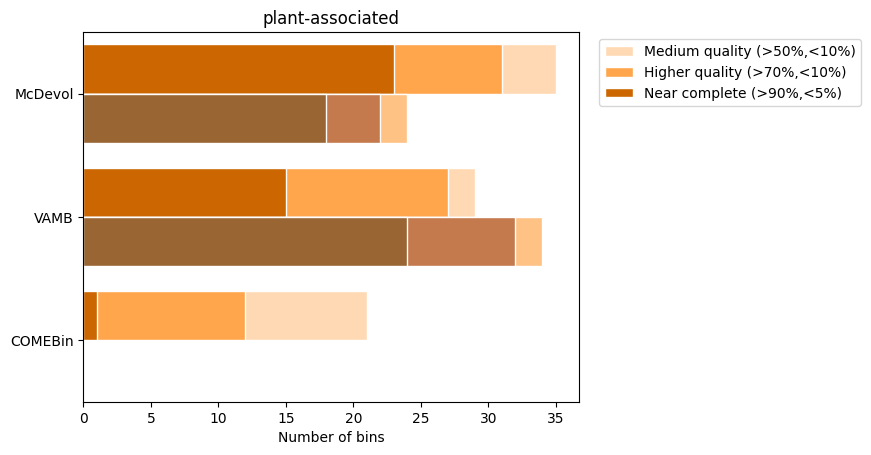

In [28]:
# plant_associated
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/multisample_cluster_split_vs_split_cluster.csv', header=0, sep='\t')

mags_counts_pl = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('plant pooled|plant_cluster_split|plant_split_cluster')]
mags_counts_pl.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_pl.index.get_level_values(0).unique()
mags_counts_plplot = mags_counts_pl.reindex(tools_order[::-1], level=0)
mags_counts_plplot = mags_counts_plplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'COMEBin']

fig, ax = plt.subplots()

# Set bar width and gap size
bar_width = 0.4
bar_gap = 0.05  # Gap between the pairs

colors_cs = ['#ffd9b3', '#ffa64d', '#cc6600']
colors_sc = ['#ffc285', '#c47a4d', '#996633']

# Calculate positions for each bar
y_pos = range(len(mags_counts_plplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set
y_pos_shifted = [pos + bar_width + 2* bar_gap for pos in y_pos] 
# Plot the stacked bar segments for "plant_cluster_split"
(mags_counts_plplot['Near-complete (90%-5%)']['plant_cluster_split'] +
 mags_counts_plplot['Higher']['plant_cluster_split'] +
 mags_counts_plplot['Medium']['plant_cluster_split']).plot(
    kind='barh', color=colors_cs[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant_cluster_split'] +
mags_counts_plplot['Higher']['plant_cluster_split']).plot(
    kind='barh', color=colors_cs[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant_cluster_split']).plot(
    kind='barh', color=colors_cs[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant_split_cluster'] +
 mags_counts_plplot['Higher']['plant_split_cluster'] +
 mags_counts_plplot['Medium']['plant_split_cluster']).plot(
    kind='barh', color=colors_sc[0], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant_split_cluster'] +
 mags_counts_plplot['Higher']['plant_split_cluster']).plot(
    kind='barh', color=colors_sc[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant_split_cluster']).plot(
    kind='barh', color=colors_sc[2], width=bar_width, ax=ax, position=1, edgecolor='white')


# Customize plot appearance
plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'][::-1], loc=(1.04, 0.8))
plt.title('plant-associated')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 2.5)
# Adjust the layout to ensure all bars are fully visible
# plt.tight_layout(rect=[1, 1, 2, 1.95])  # Adjust the rect parameter to add padding at the top

plt.savefig('plots/plant_cluster_split.png', dpi=600, format='png', bbox_inches='tight')

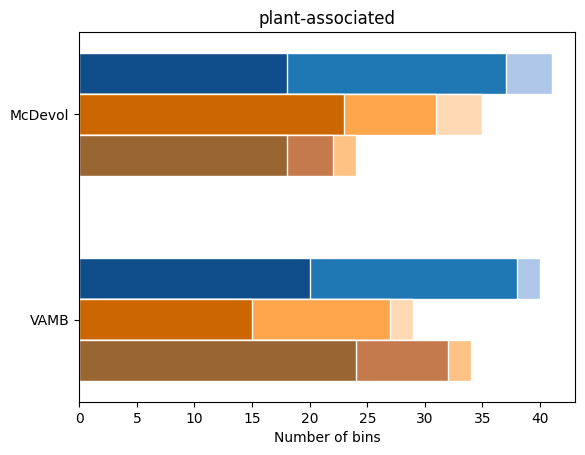

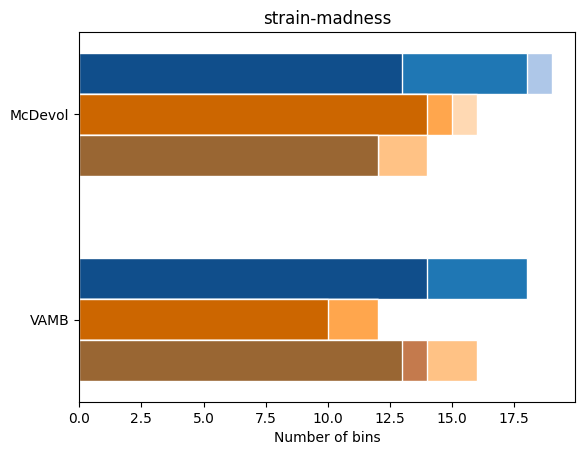

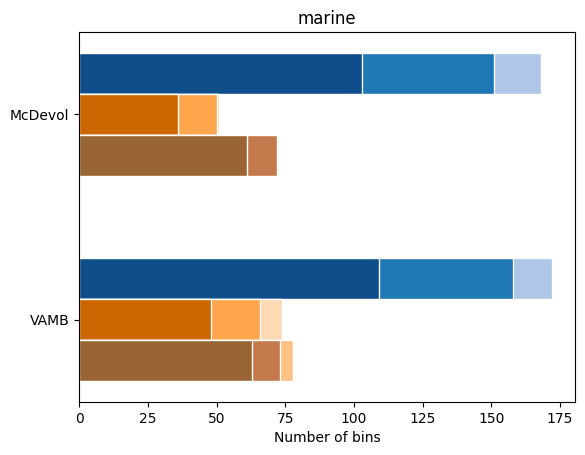

In [192]:
# plant_associated
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/multisample_cluster_split_vs_split_cluster.csv', header=0, sep='\t')

mags_counts_pl = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('plant pooled|plant_cluster_split|plant_split_cluster')]
mags_counts_pl.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_pl.index.get_level_values(0).unique()
mags_counts_plplot = mags_counts_pl.reindex(tools_order[::-1], level=0)
mags_counts_plplot = mags_counts_plplot.unstack(level=-1)

tools = ['McDevol', 'VAMB']

fig, ax = plt.subplots()

# Set bar width and gap size
bar_width = 0.2
bar_gap = 0.05  # Gap between the pairs

colors_cs = ['#cc6600', '#ffa64d', '#ffd9b3']
colors_sc = ['#996633', '#c47a4d', '#ffc285']
colors_pooled = ['#104e8b', '#1f77b4', '#aec7e8']

# Calculate positions for each bar
y_pos = range(len(mags_counts_plplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set
y_pos_pooled_shifted = [pos + 2 * (bar_width + bar_gap) for pos in y_pos] 
# Plot the stacked bar segments for "plant_cluster_split"
(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled'] +
 mags_counts_plplot['Higher']['plant pooled'] +
 mags_counts_plplot['Medium']['plant pooled']).plot(
    kind='barh', color=colors_pooled[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled'] +
 mags_counts_plplot['Higher']['plant pooled']).plot(
    kind='barh', color=colors_pooled[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled']).plot(
    kind='barh', color=colors_pooled[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant_cluster_split'] +
 mags_counts_plplot['Higher']['plant_cluster_split'] +
 mags_counts_plplot['Medium']['plant_cluster_split']).plot(
    kind='barh', color=colors_cs[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant_cluster_split'] +
mags_counts_plplot['Higher']['plant_cluster_split']).plot(
    kind='barh', color=colors_cs[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant_cluster_split']).plot(
    kind='barh', color=colors_cs[0], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant_split_cluster'] +
 mags_counts_plplot['Higher']['plant_split_cluster'] +
 mags_counts_plplot['Medium']['plant_split_cluster']).plot(
    kind='barh', color=colors_sc[2], width=bar_width, ax=ax, position=2, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant_split_cluster'] +
 mags_counts_plplot['Higher']['plant_split_cluster']).plot(
    kind='barh', color=colors_sc[1], width=bar_width, ax=ax, position=2, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant_split_cluster']).plot(
    kind='barh', color=colors_sc[0], width=bar_width, ax=ax, position=2, edgecolor='white')

ax.set_yticks([pos - 0.5 * (bar_width) for pos in y_pos])
ax.set_yticklabels(mags_counts_maplot.index.get_level_values(0).unique())

# Customize plot appearance
# plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('plant-associated')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 1.3)
# Adjust the layout to ensure all bars are fully visible
# plt.tight_layout(rect=[1, 1, 2, 1.95])  # Adjust the rect parameter to add padding at the top

plt.savefig('plots/plant_pooled_cluster_split.png', dpi=600, format='png', bbox_inches='tight')


# strain_associated
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/multisample_cluster_split_vs_split_cluster.csv', header=0, sep='\t')

mags_counts_ss = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('strain pooled|strain_cluster_split|strain_split_cluster')]
mags_counts_ss.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_ss.index.get_level_values(0).unique()
mags_counts_ssplot = mags_counts_ss.reindex(tools_order[::-1], level=0)
mags_counts_ssplot = mags_counts_ssplot.unstack(level=-1)

tools = ['McDevol', 'VAMB']

fig, ax = plt.subplots()

# Set bar width and gap size
bar_width = 0.2
bar_gap = 0.05  # Gap between the pairs

colors_cs = ['#cc6600', '#ffa64d', '#ffd9b3']
colors_sc = ['#996633', '#c47a4d', '#ffc285']
colors_pooled = ['#104e8b', '#1f77b4', '#aec7e8']

# Calculate positions for each bar
y_pos = range(len(mags_counts_ssplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set
y_pos_pooled_shifted = [pos + 2 *(bar_width + bar_gap) for pos in y_pos] 
# Plot the stacked bar segments for "strain_cluster_split"
(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled'] +
 mags_counts_ssplot['Higher']['strain pooled'] +
 mags_counts_ssplot['Medium']['strain pooled']).plot(
    kind='barh', color=colors_pooled[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled'] +
 mags_counts_ssplot['Higher']['strain pooled']).plot(
    kind='barh', color=colors_pooled[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled']).plot(
    kind='barh', color=colors_pooled[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain_cluster_split'] +
 mags_counts_ssplot['Higher']['strain_cluster_split'] +
 mags_counts_ssplot['Medium']['strain_cluster_split']).plot(
    kind='barh', color=colors_cs[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain_cluster_split'] +
mags_counts_ssplot['Higher']['strain_cluster_split']).plot(
    kind='barh', color=colors_cs[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain_cluster_split']).plot(
    kind='barh', color=colors_cs[0], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain_split_cluster'] +
 mags_counts_ssplot['Higher']['strain_split_cluster'] +
 mags_counts_ssplot['Medium']['strain_split_cluster']).plot(
    kind='barh', color=colors_sc[2], width=bar_width, ax=ax, position=2, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain_split_cluster'] +
 mags_counts_ssplot['Higher']['strain_split_cluster']).plot(
    kind='barh', color=colors_sc[1], width=bar_width, ax=ax, position=2, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain_split_cluster']).plot(
    kind='barh', color=colors_sc[0], width=bar_width, ax=ax, position=2, edgecolor='white')
ax.set_yticks([pos - 0.5 * (bar_width) for pos in y_pos])
ax.set_yticklabels(mags_counts_maplot.index.get_level_values(0).unique())
# Customize plot appearance
# plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('strain-madness')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 1.3)
# Adjust the layout to ensure all bars are fully visible
# plt.tight_layout(rect=[1, 1, 2, 1.95])  # Adjust the rect parameter to add padding at the top

plt.savefig('plots/strain_pooled_cluster_split.png', dpi=600, format='png', bbox_inches='tight')

# marine_associated
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/multisample_cluster_split_vs_split_cluster.csv', header=0, sep='\t')

mags_counts_ma = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('marine pooled|marine_cluster_split|marine_split_cluster')]
mags_counts_ma.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_ma.index.get_level_values(0).unique()
mags_counts_maplot = mags_counts_ma.reindex(tools_order[::-1], level=0)
mags_counts_maplot = mags_counts_maplot.unstack(level=-1)

tools = ['McDevol', 'VAMB']

fig, ax = plt.subplots()

# Set bar width and gap size
bar_width = 0.2
bar_gap = 0.05  # Gap between the pairs

colors_cs = ['#cc6600', '#ffa64d', '#ffd9b3']
colors_sc = ['#996633', '#c47a4d', '#ffc285']
colors_pooled = ['#104e8b', '#1f77b4', '#aec7e8']

# Calculate positions for each bar
y_pos = range(len(mags_counts_maplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set
y_pos_pooled_shifted = [pos + 2 *(bar_width + bar_gap) for pos in y_pos] 
# Plot the stacked bar segments for "marine_cluster_split"
(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled'] +
 mags_counts_maplot['Higher']['marine pooled'] +
 mags_counts_maplot['Medium']['marine pooled']).plot(
    kind='barh', color=colors_pooled[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled'] +
 mags_counts_maplot['Higher']['marine pooled']).plot(
    kind='barh', color=colors_pooled[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled']).plot(
    kind='barh', color=colors_pooled[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine_cluster_split'] +
 mags_counts_maplot['Higher']['marine_cluster_split'] +
 mags_counts_maplot['Medium']['marine_cluster_split']).plot(
    kind='barh', color=colors_cs[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine_cluster_split'] +
mags_counts_maplot['Higher']['marine_cluster_split']).plot(
    kind='barh', color=colors_cs[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine_cluster_split']).plot(
    kind='barh', color=colors_cs[0], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine_split_cluster'] +
 mags_counts_maplot['Higher']['marine_split_cluster'] +
 mags_counts_maplot['Medium']['marine_split_cluster']).plot(
    kind='barh', color=colors_sc[2], width=bar_width, ax=ax, position=2, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine_split_cluster'] +
 mags_counts_maplot['Higher']['marine_split_cluster']).plot(
    kind='barh', color=colors_sc[1], width=bar_width, ax=ax, position=2, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine_split_cluster']).plot(
    kind='barh', color=colors_sc[0], width=bar_width, ax=ax, position=2, edgecolor='white')

ax.set_yticks([pos - 0.5 * (bar_width) for pos in y_pos])
ax.set_yticklabels(mags_counts_maplot.index.get_level_values(0).unique())

# Customize plot appearance
# plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('marine')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 1.3)
# Adjust the layout to ensure all bars are fully visible
# plt.tight_layout(rect=[1, 1, 2, 1.95])  # Adjust the rect parameter to add padding at the top

plt.savefig('plots/marine_pooled_cluster_split.png', dpi=600, format='png', bbox_inches='tight')
